In [1]:
import sys, os
import xsimlab as xs
import xarray as xa
import pandas as pd
import numpy as np

sys.path.insert(0, os.path.join(os.getcwd(), '..'))

In [2]:
from vmlab.models import fruit_model
fruit_model

<xsimlab.Model (9 processes, 5 inputs)>
params
    path              [in]
    seed              [in]
env
gu_growth
    nb_leaves      [inout] ('GU',) 
fruit_growth
    nb_fruits_ini  [inout] ('GU',) 
light
photo
carbon
inflo_growth
    bloom_date     [inout] ('GU',) bloom date
fruit_quality

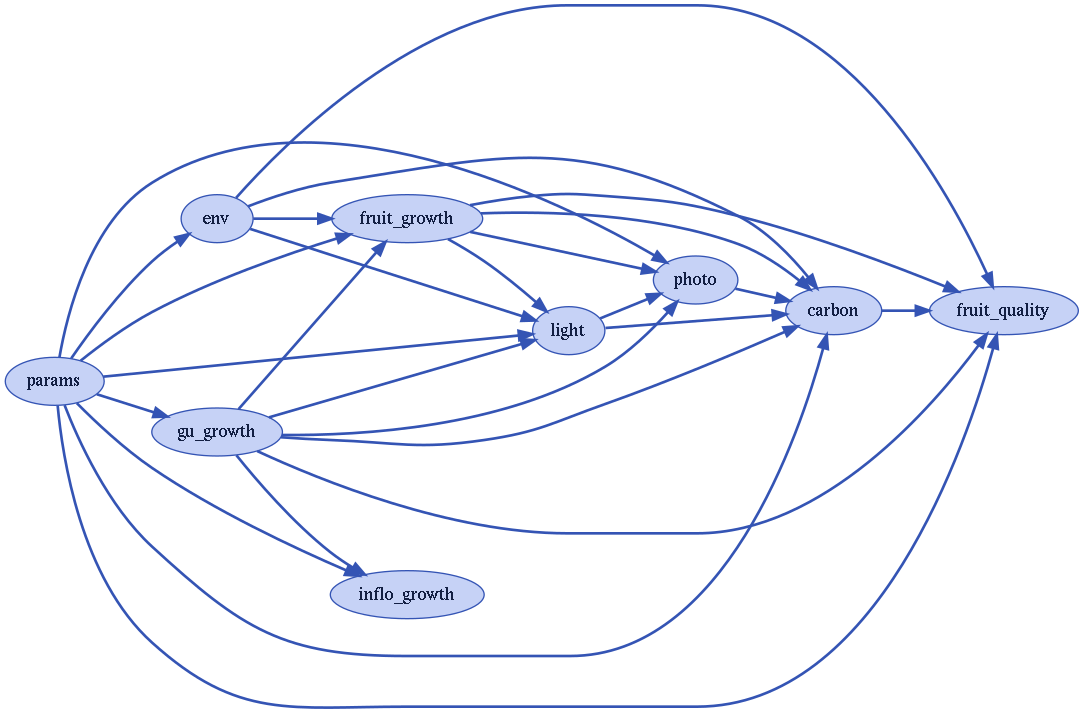

In [3]:
fruit_model.visualize(show_inputs=False, show_variables=False)

In [4]:
ds = xs.create_setup(
    model=fruit_model,
    clocks={
        'day': pd.date_range(start='2002-09-02', end='2003-03-28', freq="1d")
    },
    master_clock='day',
    input_vars={
        'params': {
            'seed': 0,
            'path': '../share/simulations/default.toml'
        },
        'inflo_growth': { 
            'bloom_date': [
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01'
            ]
        },
        'gu_growth': {
            'nb_leaves': [5, 10, 25, 50, 100, 150]
        },
        'fruit_growth': {
            'nb_fruits_ini': [1, 1, 1, 1, 1, 1]
        }
    },
    output_vars={
        'env': {
            'GR': 'day'
        },
        'photo': {
            'photo': 'day',
            'Pmax': 'day',
            'P_rate_sunlit': 'day',
            'P_rate_shaded': 'day',
            'photo_shaded': 'day',
            'photo_sunlit': 'day',
        },
        'fruit_growth': {
            'dd_cum': 'day',
            'dd_delta': 'day',
            'nb_fruits': 'day'
        },
        'fruit_quality': { 
            'FM_fruit': 'day',
            'W_fleshpeel': 'day',
            'DM_fleshpeel': 'day',
            'W_flesh': 'day',
            'DM_flesh': 'day',
            'flux_xylem_phloem': 'day',
            'transpiration_fruit': 'day',
            'turgor_pressure_fruit': 'day',
            'osmotic_pressure_fruit': 'day',
            'sucrose': 'day',
            'ripe': 'day'
            
        },
        'carbon': { 
            'DM_fruit': 'day',
            'D_fruit': 'day',
            'DM_fruit_delta': 'day',
            'remains_1': 'day',
            'remains_2': 'day',
            'remains_3': 'day',
            'assimilates': 'day',
            'reserve_leaf': 'day',
            'reserve_stem': 'day',
            'reserve_nmob_stem': 'day'
        },
        'light': { 
            'PAR': 'day',
            'PAR_shaded': 'day',
            'LA': 'day',
            'LFratio': 'day',
        },
        'gu_growth': { 
            'nb_leaves': 'day'
        },
        'inflo_growth': { 
            'DAB': 'day'
        }
    }
)

In [5]:
ds

<xarray.Dataset>
Dimensions:                      (GU: 6, day: 208)
Coordinates:
  * day                          (day) datetime64[ns] 2002-09-02 ... 2003-03-28
Dimensions without coordinates: GU
Data variables:
    params__seed                 int64 0
    params__path                 <U33 '../share/simulations/default.toml'
    inflo_growth__bloom_date     (GU) <U10 '2002-11-01' ... '2002-11-01'
    gu_growth__nb_leaves         (GU) int64 5 10 25 50 100 150
    fruit_growth__nb_fruits_ini  (GU) int64 1 1 1 1 1 1

In [6]:
ds_out = ds.xsimlab.run(model=fruit_model)

In [7]:
ds_out

<xarray.Dataset>
Dimensions:                                (GU: 6, day: 208, hour: 24)
Coordinates:
  * GU                                     (GU) int64 0 1 2 3 4 5
  * day                                    (day) datetime64[ns] 2002-09-02 .....
  * hour                                   (hour) int8 0 1 2 3 4 ... 20 21 22 23
Data variables:
    carbon__DM_fruit                       (day, GU) float64 0.0 0.0 ... 113.1
    carbon__DM_fruit_delta                 (day, GU) float64 0.0 ... 0.0004375
    carbon__D_fruit                        (day, GU) float64 0.0 ... 0.0002029
    carbon__assimilates                    (day, GU) float64 0.04289 ... 3.171
    carbon__remains_1                      (day, GU) float64 0.04289 ... 2.759
    carbon__remains_2                      (day, GU) float64 0.04289 ... 2.583
    carbon__remains_3                      (day, GU) float64 0.04289 ... 2.583
    carbon__reserve_leaf                   (day, GU) float64 0.0 0.0 ... 2.54
    carbon__reserve_nmob_stem              (day, GU) float64 2.573 ... 2.53
    carbon__reserve_stem                   (day, GU) float64 2.616 ... 2.573
    env__GR                                (day, hour) float64 0.0 0.0 ... 0.0
    fruit_growth__dd_cum                   (day, GU) float64 0.0 ... 1.421e+03
    fruit_growth__dd_delta                 (day, GU) float64 0.0 0.0 ... 8.85
    fruit_growth__nb_fruits                (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_growth__nb_fruits_ini            (GU) int64 1 1 1 1 1 1
    fruit_quality__DM_flesh                (day, GU) float64 0.0 0.0 ... 76.48
    fruit_quality__DM_fleshpeel            (day, GU) float64 0.0 0.0 ... 92.97
    fruit_quality__FM_fruit                (day, GU) float64 0.0 0.0 ... 545.8
    fruit_quality__W_flesh                 (day, GU) float64 0.0 0.0 ... 354.5
    fruit_quality__W_fleshpeel             (day, GU) float64 0.0 0.0 ... 395.7
    fruit_quality__flux_xylem_phloem       (day, GU) float64 -0.0 -0.0 ... 10.73
    fruit_quality__osmotic_pressure_fruit  (day, GU) float64 0.0 0.0 ... 2.116
    fruit_quality__ripe                    (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_quality__sucrose                 (day, GU) float64 0.0 0.0 ... 0.1204
    fruit_quality__transpiration_fruit     (day, GU) float64 0.0 0.0 ... 10.73
    fruit_quality__turgor_pressure_fruit   (day, GU) float64 0.0 0.0 ... 1.807
    gu_growth__nb_leaves                   (day, GU) int64 5 10 25 ... 100 150
    inflo_growth__DAB                      (day, GU) float64 -1.0 -1.0 ... 146.0
    inflo_growth__bloom_date               (GU) <U10 '2002-11-01' ... '2002-1...
    light__LA                              (day, GU) float64 0.0 0.0 ... 0.5579
    light__LFratio                         (day, GU) float64 0.0 0.0 ... 150.0
    light__PAR                             (day, hour) float64 0.0 0.0 ... 0.0
    light__PAR_shaded                      (day, hour) float64 0.0 0.0 ... 0.0
    params__path                           <U33 '../share/simulations/default...
    params__seed                           int64 0
    photo__P_rate_shaded                   (day, GU, hour) float64 0.0 ... 0.0
    photo__P_rate_sunlit                   (day, GU, hour) float64 0.0 ... 0.0
    photo__Pmax                            (day, GU) float64 0.0 0.0 ... 15.0
    photo__photo                           (day, GU) float64 0.0 0.0 ... 3.09
    photo__photo_shaded                    (day, GU) float64 0.0 0.0 ... 0.05871
    photo__photo_sunlit                    (day, GU) float64 0.0 0.0 ... 3.031

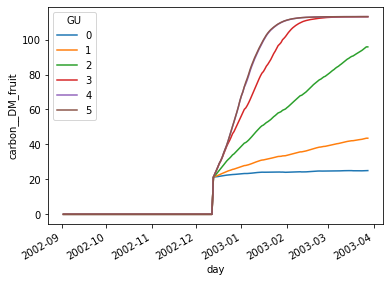

In [8]:
ds_out[('carbon__DM_fruit')].plot.line(x='day')

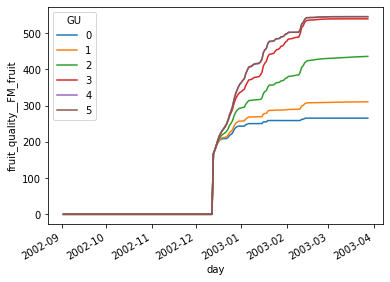

In [9]:
ds_out[('fruit_quality__FM_fruit')].plot.line(x='day')

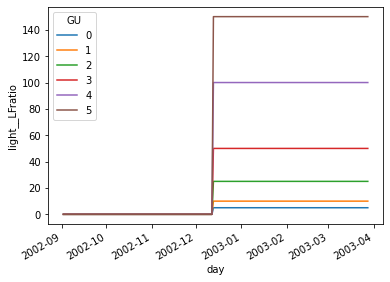

In [10]:
ds_out[('light__LFratio')].plot.line(x='day')

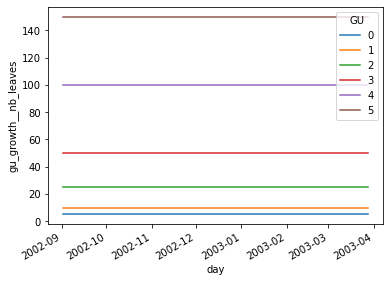

In [11]:
ds_out[('gu_growth__nb_leaves')].loc[:, :].plot.line(x='day')

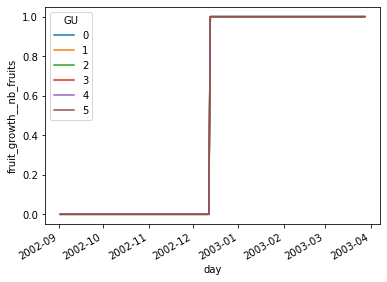

In [12]:
ds_out[('fruit_growth__nb_fruits')].loc[:, :].plot.line(x='day')

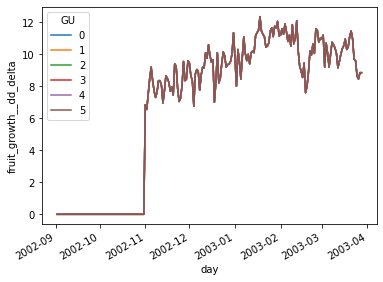

In [13]:
ds_out[('fruit_growth__dd_delta')].loc[:, :].plot.line(x='day')

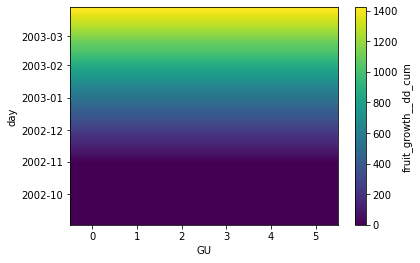

In [14]:
ds_out[('fruit_growth__dd_cum')].loc[:, :].plot()

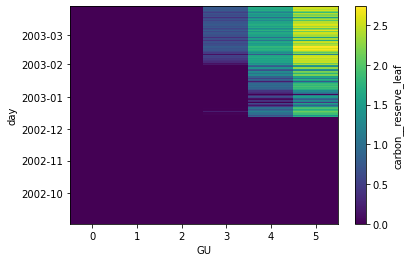

In [15]:
ds_out[('carbon__reserve_leaf')].loc[:,:].plot()

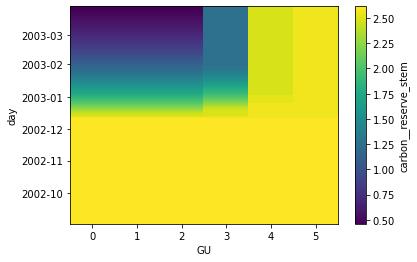

In [16]:
ds_out[('carbon__reserve_stem')].loc[:, :].plot()

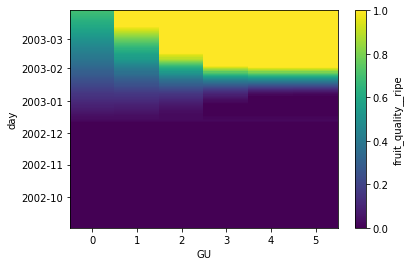

In [17]:
ds_out['fruit_quality__ripe'].loc[:,:].plot()

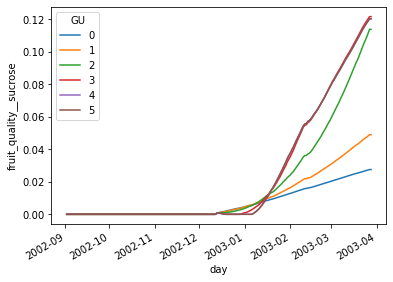

In [18]:
ds_out['fruit_quality__sucrose'].loc[:,:].plot.line(x='day')

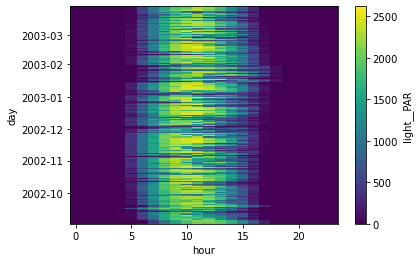

In [19]:
ds_out['light__PAR'].loc[:].plot()

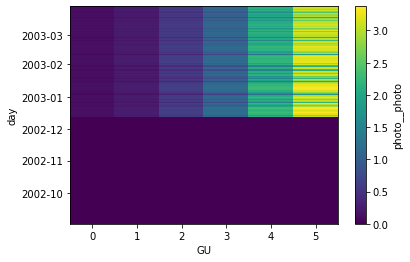

In [20]:
ds_out['photo__photo'].loc[:,:].plot()

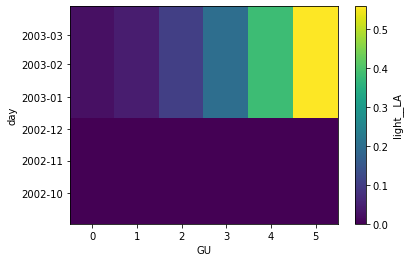

In [21]:
ds_out['light__LA'].loc[:,:].plot()

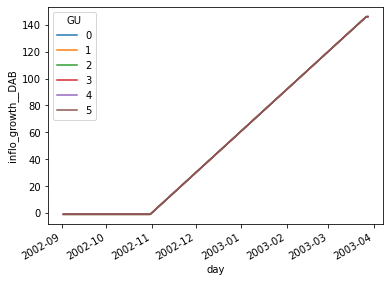

In [22]:
ds_out['inflo_growth__DAB'].loc[:,:].plot.line(x='day')